In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#Load the cifar10 dataset.  This dataset includes images from 10 different categories
#in which are commonly used in captcha programs.  It will then segment the data
#into training and testing, as well as reshaping images for con
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#class categories provided by the cifar10 dataset
class_names = ["airplane", "automobile", "bird","cat","deer","dog","frog","horse","ship","truck"]

#function used to test a data sample from the set
def plot_sample(x,y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(x[index])
  plt.xlabel(class_names[y[index]]) #label of image


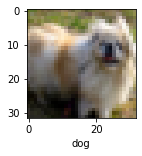

In [4]:
plot_sample(x_train, y_train, 40)

In [5]:
#building the cnn model
cnn = models.Sequential([
  layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')                       
])

In [6]:
#compile model and prepare to fit
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4702 - accuracy: 0.4749
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1161 - accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9908 - accuracy: 0.6541
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8976 - accuracy: 0.6873
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8302 - accuracy: 0.7110
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7673 - accuracy: 0.7350
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7155 - accuracy: 0.7523
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6703 - accuracy: 0.7671
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6280 - accuracy: 0.7807
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [8]:
#evaluating fit
cnn.evaluate(x_test, y_test)
x_test.shape

313/313 [==============================] - 4s 13ms/step - loss: 0.9841 - accuracy: 0.6825


(10000, 32, 32, 3)

In [9]:
#testing model prior to using
y_pred = cnn.predict(x_test)
y_pred[:5]

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test[:5]
cnn.save("model.h5")

In [10]:
#now that model is trained, this segment will take a file from autoclicker and check to see
#if it is an image belonging to one of the classifications from the cifar10 dataset
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

#class labels used to display category of image
class_names = ["airplane", "automobile", "bird","cat","deer","dog","frog","horse","ship","truck"]


for fn in uploaded.keys():
 
  #selecting image path (alternatively, file path can be coded in)
  path = fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  #creating prediction from inserted image
  prediction = cnn.predict(images, batch_size=10)
  print(fn)

  #getting label from prediction result and display to user
  result = [np.argmax(element) for element in prediction]
  result_label = result[0]
  print(result)
  print(result_label)
  print(class_names[result_label])
  


Saving 0AUWfuNXLq4zzcrRd.jfif to 0AUWfuNXLq4zzcrRd.jfif
0AUWfuNXLq4zzcrRd.jfif
[9]
9
truck


In [ ]:
from google.colab import drive
drive.mount('/content/drive')